In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
import datetime as dt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Marketing-Customer-Value-Analysis.csv')

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
df.shape

(9134, 24)

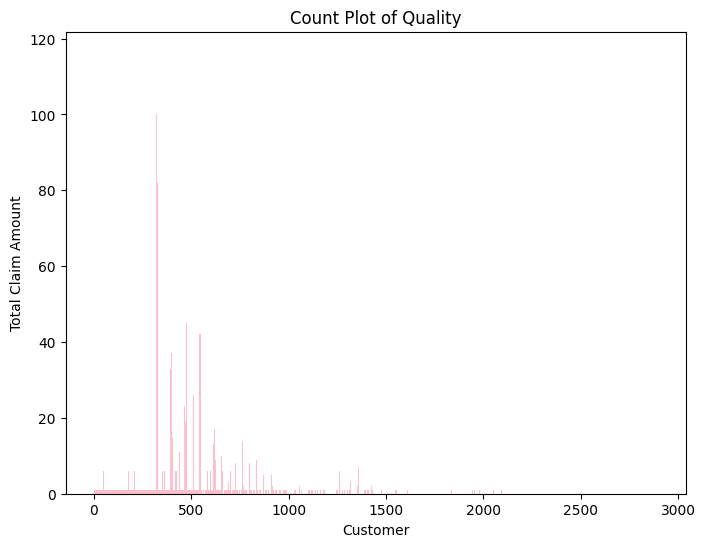

In [ ]:
quality_counts = df['Total Claim Amount'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts, color='pink')
plt.title('Count Plot of Quality')
plt.xlabel('Customer')
plt.ylabel('Total Claim Amount')
plt.show()

<Axes: xlabel='Customer', ylabel='Total Claim Amount'>

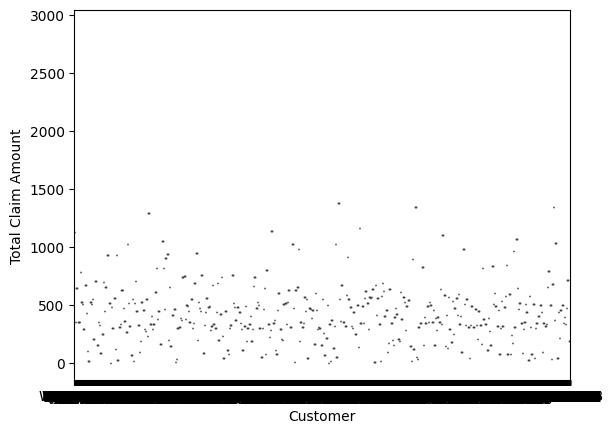

In [ ]:
sns.boxplot(x='Customer', y='Total Claim Amount', data=df)

In [16]:
dfRFM = pd.read_csv('/content/rfm_data.csv')

In [17]:
dfRFM.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [88]:
# Convert 'PurchaseDate' to datetime
dfRFM['PurchaseDate'] = pd.to_datetime(dfRFM['PurchaseDate'], format='%Y-%m-%d', utc=False).dt.date

# Calculate Recency (days since last purchase
#print(dfRFM.info())
dfRFM['Recency'] = (datetime.now().date() - dfRFM['PurchaseDate'])

In [86]:
#dfRFM.head()
#dfRFM.info()
dfRFM['Recency'].dt.days

AttributeError: Can only use .dt accessor with datetimelike values

In [90]:

# Calculate Frequency
frequency_data = dfRFM.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
dfRFM = dfRFM.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = dfRFM.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
dfRFM = dfRFM.merge(monetary_data, on='CustomerID', how='left')

MergeError: Passing 'suffixes' which cause duplicate columns {'Frequency_x'} is not allowed.

In [89]:
# Define scoring criteria for each RFM value
recency_scores = [5, 4, 3, 2, 1]  # Higher score for lower recency (more recent)
frequency_scores = [1, 2, 3, 4, 5]  # Higher score for higher frequency
monetary_scores = [1, 2, 3, 4, 5]  # Higher score for higher monetary value

# Calculate RFM scores
dfRFM['RecencyScore'] = pd.cut(dfRFM['Recency'], bins=5, labels=recency_scores)
dfRFM['FrequencyScore'] = pd.cut(dfRFM['Frequency'], bins=5, labels=frequency_scores)
dfRFM['MonetaryScore'] = pd.cut(dfRFM['MonetaryValue'], bins=5, labels=monetary_scores)

TypeError: unsupported operand type(s) for +: 'datetime.timedelta' and 'float'

In [ ]:
# Convert RFM scores to numeric type
data['RecencyScore'] = data['RecencyScore'].astype(int)
data['FrequencyScore'] = data['FrequencyScore'].astype(int)
data['MonetaryScore'] = data['MonetaryScore'].astype(int)

In [ ]:
# Calculate RFM score by combining the individual scores
data['RFM_Score'] = data['RecencyScore'] + data['FrequencyScore'] + data['MonetaryScore']

# Create RFM segments based on the RFM score
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
data['Value Segment'] = pd.qcut(data['RFM_Score'], q=3, labels=segment_labels)

In [ ]:
# RFM Segment Distribution
segment_counts = data['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = px.colors.qualitative.Pastel

# Create the bar chart
fig_segment_dist = px.bar(segment_counts, x='Value Segment', y='Count',
                          color='Value Segment', color_discrete_sequence=pastel_colors,
                          title='RFM Value Segment Distribution')

# Update the layout
fig_segment_dist.update_layout(xaxis_title='RFM Value Segment',
                              yaxis_title='Count',
                              showlegend=False)

# Show the figure
fig_segment_dist.show()